# Assignment 5

In this assignment, you will implement different linear algebra techniques.

Alice Gee, ag67642; 
Andrew Yang, ay6764; 
Mohammad Aga, mba929

### Preliminary Work for Solving Linear Systems

You will implement the following methods to help with performing LU decomposition to solve linear systems.

### `myLU`

Take a square matrix $A$ and outputs the matrices $L$ and $U$ such that $A=LU$. 

In [30]:
import numpy as np

In [31]:
np.set_printoptions(precision=2)
def myLU(A):
    n = A.shape[0] # get the dimension of the matrix A
    L = np.matrix( np.identity(n) ) # Build the identity part L
    U = np.copy(A) # start the U matrix as a copy of A
    for j in range(0,n-1):
        for i in range(j+1,n):
            # ratio of bottom value over pivot value 
            mult = U[i,j] / U[j,j]
            U[i, j+1:n] = U[i, j+1:n] - (mult * U[j,j+1:n])
            #print(mult * U[j,j+1:n])
            L[i,j] = mult
            U[i,j] = 0 # why are we doing this?
    return L,U

### `lsolve`
Solve $Ly=b$ for $y$, where the matrix $L$ is assumed to be lower triangular with ones on the main diagonal.

In [32]:
def lsolve(L, b):
    L = np.matrix(L) # make sure L is the correct data type
    n = b.size # what does this do?
    y = np.matrix( np.zeros( (n,1)) ) # what does this do?
    for i in range(n):
        # start the loop by assigning y to the value on the right
        y[i] = b[i] 
        for j in range(i): # now adjust y 
            y[i] = y[i] - L[i,j] * y[j]
    return(y)

### `usolve`
Solve $Ux=y$ using backward substitution. The matrix $U$ is assumed to be upper triangular.

In [33]:
def usolve(U, y):
    n = y.size
    x = np.matrix( np.zeros( (n,1)))
    for i in range(n-1, -1, -1):     # what should we be looping over?
        x[i] = y[i] / U[i,i]      # what should we be dividing by?
        for j in range(i+1, n): # what should we be looping over:
            x[i] = x[i] - U[i,j] * x[j] / U[i,i] # complete this line 
    return(x)

### Putting it All Together to Solve Linear Systems

Let $A$ be a square matrix in $\mathbb{R}^{n \times n}$ and let $\vec x, \vec b \in \mathbb{R}^n$. To solve the problem $A \vec x = \vec b$,
1. Factor $A$ into lower and upper triangular matrices $A = LU$. (Implement `L, U = myLU(A)`)
2. The system can now be written as $LU \vec x = \vec b$. Substitute $U \vec x = \vec y$ and solve the problem $L \vec y = \vec b$ with forward substitution. (Use `y = lsolve(L, b)`)
3. Finally, solve the system $U \vec x = \vec y$ with backward substitution. (Use `x = usolve(U, y)`)

## Exercise 4.36

Implement the `lsolve` (Forward Substutition Algorithm, see Definition 4.5 in textbook), `usolve` (Backward Substitution Algorithm, see Definition 4.6 in textbook), and `myLU` (LU Decomposition, see Definition 4.4 in textbook) functions and test them on a linear system for which you know the answer. Then test your problem on a system that you don’t know the solution to. As a way to compare your solutions you should:
* Find Python’s solution using `np.linalg.solve()` and compare your answer to that one using `np.linalg.norm()` to give the error between the two.
* Time your code using the time library as follows:
  * use the code `starttime = time.time()` before you start the main computation
  * use the code `endtime = time.time()` after the main computation
  * then calculate the total elapsed time with `totaltime = endtime - starttime`
* Compare the timing of your $LU$ solve against `np.linalg.solve()` and against the RREF algorithm in the `sympy` library.

### Your Test Case HERE

Place your test case in this cell, formatted using $\LaTeX$. Example:

$$\begin{bmatrix}
1 & 2\\
2 & 1
\end{bmatrix} \times \begin{bmatrix}
x\\
y
\end{bmatrix} = \begin{bmatrix}
-3 \\
15 
\end{bmatrix} $$

In [34]:
import time 
A = np.matrix([[1,2], [2,1]])
b = np.matrix([[-3], [15]])

# build a symbolic augmented matrix
import sympy as sp
Ab = sp.Matrix(np.c_[A,b]) 
# note that np.c_[A,b] does a column concatenation of A with b

t0 = time.time()
Abrref = Ab.rref()[0]
t1 = time.time()
RREFTime = t1-t0

t0=time.time()
exact = np.linalg.solve(A, b)
t1=time.time()
exactTime = t1-t0

t0 = time.time()
L, U = myLU(A) 
y = lsolve(L, b)
x = usolve(U, y)
t1 = time.time()
LUTime = t1-t0

print("Time for symbolic RREF:\t\t\t",RREFTime)
print("Time for np.linalg.solve() solution:\t",exactTime)
print("Time for LU solution:\t\t\t",LUTime)
err = np.linalg.norm(x-exact)
print("Error between LU and np.linalg.solve():",err)

Time for symbolic RREF:			 0.0006709098815917969
Time for np.linalg.solve() solution:	 0.000759124755859375
Time for LU solution:			 0.00048470497131347656
Error between LU and np.linalg.solve(): 0.0


In [35]:
A = np.matrix([[8, 5, -6], [-12, -9,12], [-3, -3, 5]], dtype=float)
b = np.matrix([[-3], [15], [-8]])

# build a symbolic augmented matrix
import sympy as sp
Ab = sp.Matrix(np.c_[A,b]) 
# note that np.c_[A,b] does a column concatenation of A with b

t0 = time.time()
Abrref = Ab.rref()[0]
t1 = time.time()
RREFTime = t1-t0

t0=time.time()
exact = np.linalg.solve(A, b)
t1=time.time()
exactTime = t1-t0

t0 = time.time()
L, U = myLU(A) 
y = lsolve(L, b)
x = usolve(U, y)
t1 = time.time()
LUTime = t1-t0

print("Time for symbolic RREF:\t\t\t",RREFTime)
print("Time for np.linalg.solve() solution:\t",exactTime)
print("Time for LU solution:\t\t\t",LUTime)
err = np.linalg.norm(x-exact)
print("Error between LU and np.linalg.solve():",err)

Time for symbolic RREF:			 0.008702993392944336
Time for np.linalg.solve() solution:	 0.00025391578674316406
Time for LU solution:			 0.001590728759765625
Error between LU and np.linalg.solve(): 0.0


## Exercise 4.47 (QR Factorization)

Refer to Section 4.5 in the book.
The following Python function definition is partially complete. Fill in the missing pieces of code and then test your code on square matrices of many different sizes. The easiest way to check if you have an error is to find the normed difference between $A$ and $QR$ is with `np.linalg.norm(A - Q*R)`

In [36]:
import numpy as np
def myQR(A):
    n = A.shape[0]
    m = A.shape[1]
    Q = np.matrix( np.zeros( (n,n) ) )
    for j in range( m ): # The outer loop goes over the columns
        # columns of A
        q = A[:,j]
        # The next loop is meant to do all of the projections.
        # When do you start the inner loop and how far do you go?
        # Hint: You don't need to enter this loop the first time 
        for i in range(j, -1, -1): 
            length_of_leg = np.sum(A[:,j].T * Q[:,i])
            q = q - length_of_leg * Q[:,i] # This is where we do projections
        Q[:,j] = q / np.linalg.norm(q)
    
    Q_t = Q.transpose()
    R = Q_t * A
    return Q, R

In [37]:
A = np.matrix([[1,0,0], [1, 1, 0], [1, 1, 1], [1, 1, 1]])
Q, R = myQR(A)
print(np.linalg.norm(A - Q*R))
B = np.matrix([[1,1,1], [1, 0, 0], [0, 0, 1], [0, 1, 1]])
Q, R = myQR(B)
print(np.linalg.norm(B - Q*R))
C = np.matrix([[3,1],[4,1]])
Q, R = myQR(C)
print(np.linalg.norm(C - Q*R))

5.017727660498068e-16
1.0491308602632318e-15
3.3176911878838166e-15


## Exercise 4.52
Fit a quadratic function to the following data using the technique outlined in Theorem 4.3 (textbook). Make a plot of the points along with your best fit curve.

| x  | y      |
|----|--------|
| 0  | -6.8   |
| 1  | 11.8   |
| 2  | 50.6   |
| 3  | 94     |
| 4  | 224.3  |
| 5  | 301.7  |
| 6  | 499.2  |
| 7  | 454.7  |
| 8  | 578.5  |
| 9  | 1102   |
| 10 | 1203.2 |

Code to download the data directly is given below.  

/var/folders/sx/gw6n5mnj28x21kcmksnp_p240000gn/T/ipykernel_6002/3859277473.py:16: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  A[i] = [x[i]**2, x[i], 1]


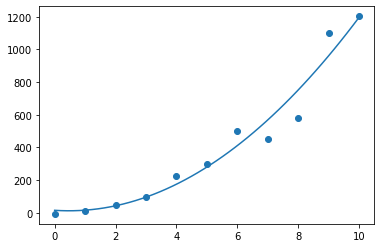

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

URL1 = 'https://raw.githubusercontent.com/NumericalMethodsSullivan'
URL2 = '/NumericalMethodsSullivan.github.io/master/data/'
URL = URL1+URL2
data = np.array( pd.read_csv(URL+'Exercise4_52.csv') )

x = np.hsplit(data, 2)[0]
b = np.hsplit(data, 2)[1]
plt.scatter(x, b)

A = np.matrix(np.zeros((11,3)))
for i in range(len(x)):
    A[i] = [x[i]**2, x[i], 1]
A2 = A.transpose() * A
b = A.transpose() * b

L, U = myLU(A2) 
y = lsolve(L, b)
x = usolve(U, y)

a = float(x[0])
b = float(x[1])
c = float(x[2])

x = np.linspace(0,10)
f = a*x**2 + b*x + c

plt.plot(x, f)


# make each pair into it's own quadratic equation --> each row in a matrix, y values into b matrix 

## Exercise 4.61/4.62
Go through [Theorem 4.5](https://numericalmethodssullivan.github.io/ch-linearalgebra.html#thm:power) carefully and describe what we need to do in each step and why we’re doing it. Then complete all of the missing pieces of the following Python function.

In [39]:
import numpy as np
import math
def myPower(A, tol = 1e-8):
    n = A.shape[0]
    x = np.matrix( np.random.randn(n,1) )
    
    # turn x in a unit vector so we can use the magnitude for later calculations 
    x = x / (np.sqrt(np.vdot(x,x)))
    
    # initialize the dominant eigenvalue, which is arbitrary since the value will change later 
    L = 1 
    
    # Given Ax = Lx, this checks the difference between Ax and Lx
    diff = np.linalg.norm(A*x - float(L)*x)
    
    # keep track of how many steps we've taken
    counter = 0 
    
    # a loop until the difference between Ax and Lx is not greater than the tolerance 
    ## when Ax ≈ Lx, breaks out of while loop and returns the dominant eigenvalue L
    while (diff.all()) > tol and counter < 10000:
        
        # update the dominant eigenvector to get a new estimate that is closer to the actual eigenvalue/eigenvector
        x1 = A * x 
        
        # approximate the eignevalue with a dot product of the previous and current eigenvector 
        L = np.vdot(x1, x)
        
        # Given Ax = Lx, this checks the difference between Ax and Lx
        diff = np.linalg.norm(A*x - float(L)*x)
        
        # normalize (i.e. turn into unit vector) so we can use the magnitude for later calculations 
        x = x1 / (np.sqrt(np.vdot(x1,x1))) 
        
        # increment the counter
        counter += 1 
    return x, L

Test your ```myPower()``` function on several matrices where you know the eigenstructure. Then try the ```myPower()``` function on larger random matrices. You can check that it is working using `np.linalg.eig()` (be sure to normalize the vectors in the same way so you can compare them.)

In [40]:
# test myPower() with smaller matrix
A = np.matrix([[8, 5, -6], [-12, -9,12], [-3, -3, 5]])
print(myPower(A, tol = 1e-8))

A = np.matrix([[4,2], [5, 7]])
print(myPower(A, tol = 1e-8))

(matrix([[ 1.0e+00],
        [-1.0e+00],
        [ 2.9e-17]]), matrix([[3.]]))
(matrix([[-1. ],
        [-2.5]]), matrix([[9.]]))


In [41]:
# test myPower() with larger matrix 
A = np.matrix([[8, 5, -6, 4], [-12, -9,12, 2], [-3, -3, 5, 6], [7, 2, 8, 1]])
estimate = float(myPower(A, tol = 1e-8)[1])
actual = np.amax(np.linalg.eig(A)[0])
error = abs(actual - estimate)
print(error)

A = np.matrix([[4, 5, 9, -4], [-12, -9,12, 2], [4, -3, 5, 6], [7, 5, 8, -3]])
estimate = float(myPower(A, tol = 1e-8)[1])
actual = np.amax(np.linalg.eig(A)[0])
error = abs(actual - estimate)
print(error)

8.881784197001252e-15
7.105427357601002e-14
